In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score 
import statsmodels.api as sm 
import warnings
import matplotlib.pyplot as plt
#ignore warnings 
warnings.filterwarnings('ignore') 
warnings.simplefilter(action='ignore', category=FutureWarning)
import os 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

In [2]:
from time import strptime, strftime, mktime, gmtime
import datetime as dt

In [4]:
!pip install missingno

In [5]:
from IPython.display import display
pd.options.display.max_columns = None
import missingno as msno

## Set the windows directory to input dataset folder

In [5]:
#os.chdir('C:/Users/wkhan27/Desktop/Practice/UPGrad')

### Read Driver data

In [6]:
# Read Dataset 
drivers = pd.read_csv('drivers.csv')

## Check Missing value

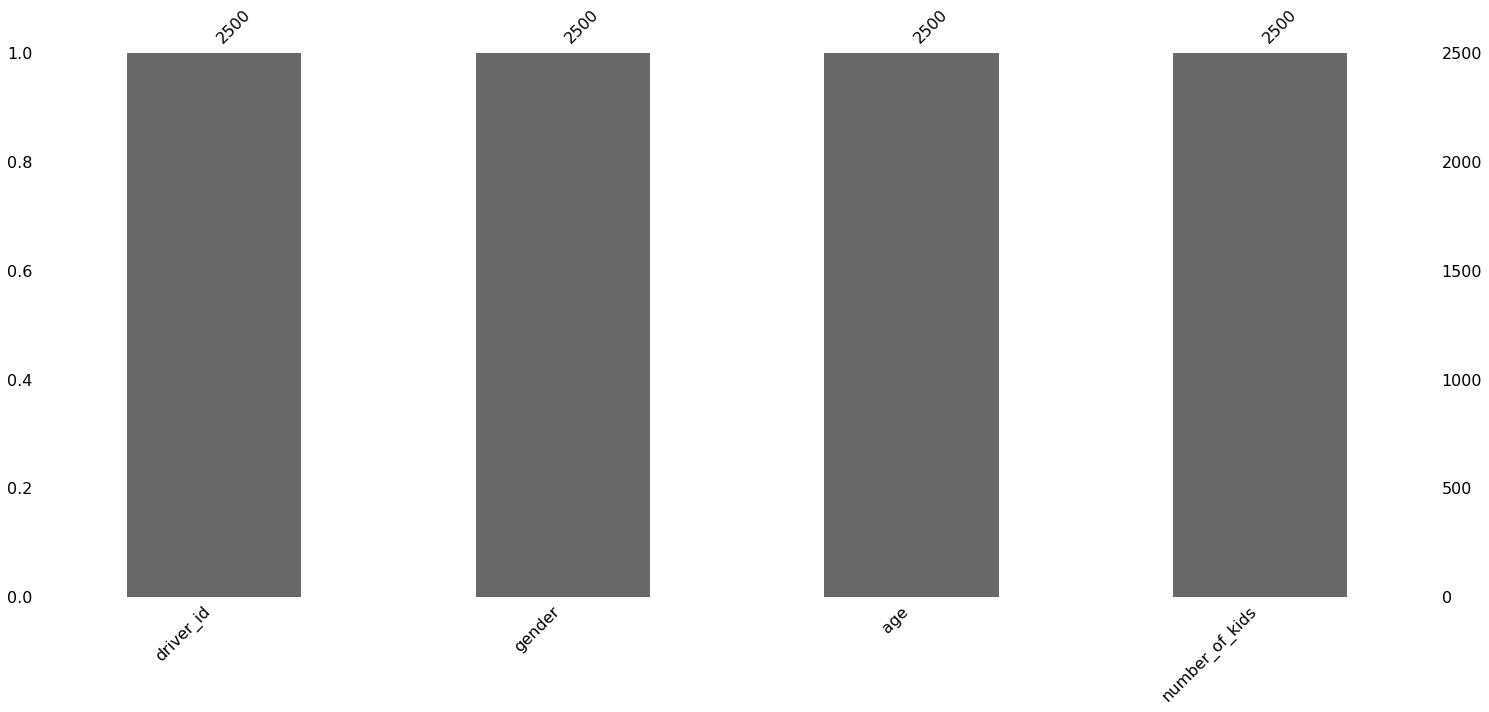

In [7]:
plt.figure(figsize= (5,5) )
msno.bar(drivers)
# import matplotlib.pyplot as plt
# %matplotlib inline
# drivers.age.plot(kind="bar")
plt.show()

In [8]:
drivers.head(2)

,driver_id,gender,age,number_of_kids
0,979863,MALE,26,2
1,780123,MALE,60,2


In [9]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   driver_id       2500 non-null   int64 
 1   gender          2500 non-null   object
 2   age             2500 non-null   int64 
 3   number_of_kids  2500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 78.2+ KB


In [10]:
drivers.shape

(2500, 4)

### Gender wise distribution

In [11]:
drivers.groupby('gender').size()

gender
FEMALE     606
MALE      1894
dtype: int64

### Read Ping data

In [12]:
# Read Dataset 
pings = pd.read_csv('pings.csv')

In [13]:
pings.head(2)

,driver_id,ping_timestamp
0,899313,1496278800
1,373017,1496278800


In [14]:
pings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50528701 entries, 0 to 50528700
Data columns (total 2 columns):
 #   Column          Dtype
---  ------          -----
 0   driver_id       int64
 1   ping_timestamp  int64
dtypes: int64(2)
memory usage: 771.0 MB


In [15]:
pings.shape

(50528701, 2)

## Convert unix timestamp to time stamp

In [16]:
pings['ping_timestamp']=pd.to_datetime(pings['ping_timestamp'], unit='s')

### Convert date into weekdays

In [17]:
pings['date'] = pd.to_datetime(pings['ping_timestamp'], unit='s',origin='unix').dt.date

In [18]:
pings['dayofweek'] = pd.to_datetime(pings['ping_timestamp'], unit='s',origin='unix').dt.dayofweek

In [19]:
pings.head(2)

,driver_id,ping_timestamp,date,dayofweek
0,899313,2017-06-01 01:00:00,2017-06-01,3
1,373017,2017-06-01 01:00:00,2017-06-01,3


In [20]:
pings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50528701 entries, 0 to 50528700
Data columns (total 4 columns):
 #   Column          Dtype         
---  ------          -----         
 0   driver_id       int64         
 1   ping_timestamp  datetime64[ns]
 2   date            object        
 3   dayofweek       int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.5+ GB


### Converting week days number to Weekday name

In [21]:
pings.loc[(pings['dayofweek'] == 0 ) ,'Day'] = 'Monday'
pings.loc[(pings['dayofweek'] == 1 ) ,'Day'] = 'Tuesday'
pings.loc[(pings['dayofweek'] == 2) ,'Day'] = 'Wednesday'
pings.loc[(pings['dayofweek'] == 3 ) ,'Day'] = 'Thursday'
pings.loc[(pings['dayofweek'] == 4),'Day'] = 'Friday'
pings.loc[(pings['dayofweek'] == 5) ,'Day'] = 'Saturday'
pings.loc[(pings['dayofweek'] == 6) ,'Day'] = 'Sunday'

In [22]:
pings.head(2)

,driver_id,ping_timestamp,date,dayofweek,Day
0,899313,2017-06-01 01:00:00,2017-06-01,3,Thursday
1,373017,2017-06-01 01:00:00,2017-06-01,3,Thursday


In [23]:
pings['driver_id'].value_counts().head(5)

320227    73856
627176    44660
919150    43233
232551    43086
671320    42563
Name: driver_id, dtype: int64

In [24]:
pings['date'].value_counts().head(5)

2017-06-16    2658597
2017-06-12    2639043
2017-06-06    2634163
2017-06-13    2633107
2017-06-21    2633025
Name: date, dtype: int64

In [25]:
pings.shape

(50528701, 5)

### Merging drivers data with pings, to accumulate driver's personal data & drivng data

In [34]:
driver_data = pd.merge(pings,drivers, how = 'left', left_on=['driver_id'], right_on=['driver_id'])

In [35]:
driver_data.head(3)

,driver_id,ping_timestamp,date,dayofweek,Day,gender,age,number_of_kids
0,899313,2017-06-01 01:00:00,2017-06-01,3,Thursday,MALE,27,0
1,373017,2017-06-01 01:00:00,2017-06-01,3,Thursday,MALE,30,2
2,798984,2017-06-01 01:00:00,2017-06-01,3,Thursday,FEMALE,72,0


In [28]:
driver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50667137 entries, 0 to 50667136
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   driver_id       int64         
 1   ping_timestamp  datetime64[ns]
 2   date            object        
 3   dayofweek       int64         
 4   Day             object        
 5   gender          object        
 6   age             int64         
 7   number_of_kids  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.4+ GB


# Driver's daily online availability can be done in following ways:

### a) check daily wise max(Ping Time) - Min(ping time ), but doing so will give a false impression about driver's availability altough driver might have taken time off between his/her shift & by calculating max - min we will loose this information.

### b)(Count the number of ping -1 ) * 15 will give availablilty in seconds : It'll take care of any timeoff if taken by driver.
#### -1: to counter first ping, as 1st ping represents 0 senconds of availability

### Count number of pings & online hours

In [36]:
driver_detail = pd.DataFrame({'count': 
                              driver_data.groupby(
                                  ["driver_id","date","Day","dayofweek",
                                   "gender","age","number_of_kids"]).size()-1}).reset_index()

In [30]:
del driver_data

In [37]:
dates = list( driver_data.date.unique() )

In [50]:
dates

[datetime.date(2017, 6, 1),
 datetime.date(2017, 6, 2),
 datetime.date(2017, 6, 3),
 datetime.date(2017, 6, 4),
 datetime.date(2017, 6, 5),
 datetime.date(2017, 6, 6),
 datetime.date(2017, 6, 7),
 datetime.date(2017, 6, 8),
 datetime.date(2017, 6, 9),
 datetime.date(2017, 6, 10),
 datetime.date(2017, 6, 11),
 datetime.date(2017, 6, 12),
 datetime.date(2017, 6, 13),
 datetime.date(2017, 6, 14),
 datetime.date(2017, 6, 15),
 datetime.date(2017, 6, 16),
 datetime.date(2017, 6, 17),
 datetime.date(2017, 6, 18),
 datetime.date(2017, 6, 19),
 datetime.date(2017, 6, 20),
 datetime.date(2017, 6, 21),
 datetime.date(2017, 6, 22)]

In [38]:
driver_detail['online_hours'] = driver_detail['count']*15/3600

In [ ]:
driver_detail.head(2)

In [ ]:
driver_detail.info()

In [ ]:
driver_detail.head(2)

In [ ]:
driver_detail.shape

In [39]:
daycount = pd.DataFrame({'count': driver_detail.groupby(["dayofweek","Day"]).size()}).reset_index()

In [ ]:
daycount

## Weekends has less number of ping frequencies, i.e most drivers are on leave

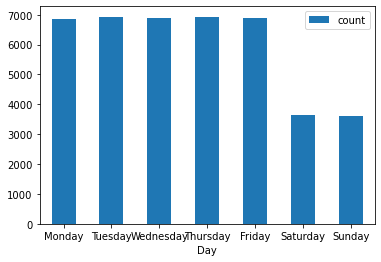

In [34]:
daycount.plot.bar(x='Day', y='count', rot=0)

### Drivers working hour is higher during weekends compared to weekdays

In [40]:
driver_detail.groupby('dayofweek').agg({'online_hours': np.mean, 'Day': np.size}).reset_index()

,dayofweek,online_hours,Day
0,0,4.759134,6859
1,1,4.765572,6918
2,2,4.755191,6904
3,3,4.722048,6934
4,4,4.785614,6880
5,5,6.416966,3631
6,6,6.514531,3612


## Defining weekend & weekdays

In [41]:
driver_detail.loc[(driver_detail['dayofweek'] < 5), 'Week_day'] = 'weekday'
driver_detail.loc[(driver_detail['dayofweek'] > 4), 'Week_day'] = 'weekend'

In [37]:
driver_detail.head(3)

,driver_id,date,Day,dayofweek,gender,age,number_of_kids,count,online_hours,Week_day
0,111556,2017-06-01,Thursday,3,FEMALE,49,4,483,2.0125,weekday
1,111556,2017-06-02,Friday,4,FEMALE,49,4,543,2.2625,weekday
2,111556,2017-06-05,Monday,0,FEMALE,49,4,1014,4.2250,weekday


## Day wise ping average count & available "driver day" distribution

## Weekends has more Ping count compared to weekdays

In [42]:
driver_detail.groupby('Day').agg({'count': np.mean, 'Day': np.size})

,count,Day
Day,,
Friday,1148.547384,6880
Monday,1142.192156,6859
Saturday,1540.071881,3631
Sunday,1563.487542,3612
Thursday,1133.291607,6934
Tuesday,1143.737207,6918
Wednesday,1141.245800,6904


### Weekend & weekday wise ditributionm

In [43]:
driver_detail.groupby('Week_day').agg({'count': np.mean, 'Day': np.size}).reset_index()

,Week_day,count,Day
0,weekday,1141.791013,34495
1,weekend,1551.748999,7243


## Removing unwanted variables

In [44]:
Daywise_data=driver_detail[['Day','gender','age','number_of_kids','online_hours']]

In [56]:
Daywise_data.head(4)

,Day,gender,age,number_of_kids,online_hours
0,Thursday,FEMALE,49,4,2.012500
1,Friday,FEMALE,49,4,2.262500
2,Monday,FEMALE,49,4,4.225000
3,Tuesday,FEMALE,49,4,2.770833


In [57]:
Daywise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41738 entries, 0 to 41737
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Day             41738 non-null  object 
 1   gender          41738 non-null  object 
 2   age             41738 non-null  int64  
 3   number_of_kids  41738 non-null  int64  
 4   online_hours    41738 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.6+ MB


In [45]:
Column_list1 = Daywise_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
Column_list1

['age', 'number_of_kids', 'online_hours']

In [46]:
X = Daywise_data.loc[:, Daywise_data.columns != 'online_hours']
y = Daywise_data.loc[:, Daywise_data.columns == 'online_hours']

In [47]:
Column_list = Daywise_data.select_dtypes(include=['object']).columns.tolist()
Column_list

['Day', 'gender']

In [48]:
Column_list1 = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
Column_list1

['age', 'number_of_kids']

## Multicollinerity

### Check multicollinearity

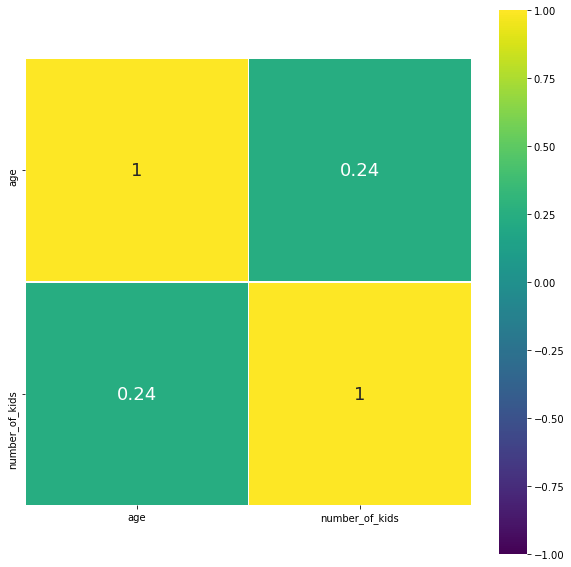

In [62]:
corr = X[Column_list1].corr(method = 'pearson') 
plt.figure(figsize=(10, 10)) 
sns.heatmap(corr,cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 18}, square=True);

In [49]:
df_final = pd.get_dummies(Daywise_data, columns=Column_list,drop_first=True)

In [64]:
df_final.head(2)

,age,number_of_kids,online_hours,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,gender_MALE
0,49,4,2.0125,0,0,0,1,0,0,0
1,49,4,2.2625,0,0,0,0,0,0,0


### Create Test train data with 80:20 proportion

In [50]:
data_final_vars=df_final.columns.values.tolist()

Y_Var=['online_hours']
X_Var=[i for i in data_final_vars if i not in Y_Var]

y = df_final['online_hours']
X = df_final[X_Var]

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 

### Linear regression using statsmodels.api

In [51]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_train = lr.predict(X_train)

In [52]:
pd.DataFrame(np.round(list(zip(y_train,pred_train)),2),columns=['Act Hours','Pred Hours'],index=X_train.index)

,Act Hours,Pred Hours
17666,8.09,6.81
28182,5.34,5.92
22558,1.30,3.19
35962,9.00,6.70
28300,1.89,4.92
...,...,...
20757,8.03,5.28
32103,5.21,3.32
30403,7.84,6.27
21243,4.11,4.89


In [53]:
X_train['Intercept'] = 0         ##### as if driver is absent online hours will be zero, so cannot have any intercept
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           online_hours   R-squared (uncentered):                   0.804
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                          1.523e+04
Date:                Thu, 05 Aug 2021   Prob (F-statistic):                        0.00
Time:                        22:52:05   Log-Likelihood:                         -78072.
No. Observations:               33390   AIC:                                  1.562e+05
Df Residuals:                   33381   BIC:                                  1.562e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0155      0.001     19.242      0.000       0.014       0.017
number_of_kids     0.2349      0.009     25.072      0.000       0.217       0.253
Day_Monday         1.5243      0.043     35.480      0.000       1.440       1.609
Day_Saturday       2.8165      0.054     52.159      0.000       2.711       2.922
Day_Sunday         2.8680      0.055     52.566      0.000       2.761       2.975
Day_Thursday       1.4839      0.043     34.597      0.000       1.400       1.568
Day_Tuesday        1.5256      0.043     35.592      0.000       1.442       1.610
Day_Wednesday      1.5278      0.043     35.576      0.000       1.444       1.612
gender_MALE        3.1312      0.030    106.030      0.000       3.073       3.189
Intercept               0          0        nan        nan           0           0
==============================================================================
Omnibus:                       50.969   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.566
Skew:                          -0.005   Prob(JB):                     5.71e-10
Kurtosis:                       2.825   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [94]:
pd.DataFrame(np.round(list(zip(y_train,predictions)),2),columns=['Act Hours','Pred Hours'],index=X_train.index)

,Act Hours,Pred Hours
17666,8.09,6.30
28182,5.34,5.72
22558,1.30,1.96
35962,9.00,6.45
28300,1.89,6.20
...,...,...
20757,8.03,5.07
32103,5.21,2.15
30403,7.84,6.93
21243,4.11,6.22


In [52]:
mean_squared_error(y_train,predictions)**(0.5)

2.507415772618566

In [53]:
df_final.head(2)

,age,number_of_kids,online_hours,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,gender_MALE
0,49,4,2.0125,0,0,0,1,0,0,0
1,49,4,2.2625,0,0,0,0,0,0,0


In [54]:
X_train.head(2)

,age,number_of_kids,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,gender_MALE,Intercept
17666,23,0,0,1,0,0,0,0,1,0
28182,23,3,0,0,0,0,1,0,1,0


In [55]:
X_test.head(2)

,age,number_of_kids,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,gender_MALE
34863,46,3,0,0,0,1,0,0,1
40285,61,1,1,0,0,0,0,0,1


### Error is expected

In [ ]:
#y_predict = model.predict(X_test)

### Added intercept = 0, so that model can run in Dataframe

In [57]:
X_test['Intercept'] = 0  

In [58]:
X_test.head(2)

,age,number_of_kids,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,gender_MALE,Intercept
34863,46,3,0,0,0,1,0,0,1,0
40285,61,1,1,0,0,0,0,0,1,0


In [59]:
y_predict=model.predict(X_test)

In [60]:
mean_squared_error(y_test,y_predict)**(0.5)

2.5063045594926887

### Import Test Data

In [61]:
# Read Dataset 
test = pd.read_csv('test.csv')

In [62]:
test.head(2)

,driver_id,date,online_hours
0,979863,2017-6-28,7
1,979863,2017-6-27,9


In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   driver_id     17500 non-null  int64 
 1   date          17500 non-null  object
 2   online_hours  17500 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 410.3+ KB


## Create Day of the week variable

In [64]:
test['dayofweek'] = pd.to_datetime(pd.to_datetime(test['date'],
                                   infer_datetime_format=True), 
                                   unit='s',origin='unix').dt.dayofweek

In [65]:
test.head(2)

,driver_id,date,online_hours,dayofweek
0,979863,2017-6-28,7,2
1,979863,2017-6-27,9,1


In [66]:
test.loc[(test['dayofweek'] == 0 ) ,'Day'] = 'Monday'
test.loc[(test['dayofweek'] == 1 ) ,'Day'] = 'Tuesday'
test.loc[(test['dayofweek'] == 2) ,'Day'] = 'Wednesday'
test.loc[(test['dayofweek'] == 3 ) ,'Day'] = 'Thursday'
test.loc[(test['dayofweek'] == 4),'Day'] = 'Friday'
test.loc[(test['dayofweek'] == 5) ,'Day'] = 'Saturday'
test.loc[(test['dayofweek'] == 6) ,'Day'] = 'Sunday'

### Join Driver's info with test data

In [67]:
test_data = pd.merge(test,drivers, how = 'left', left_on=['driver_id'], right_on=['driver_id'])

In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17542 entries, 0 to 17541
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   driver_id       17542 non-null  int64 
 1   date            17542 non-null  object
 2   online_hours    17542 non-null  int64 
 3   dayofweek       17542 non-null  int64 
 4   Day             17542 non-null  object
 5   gender          17542 non-null  object
 6   age             17542 non-null  int64 
 7   number_of_kids  17542 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.2+ MB


In [69]:
test_data.head(2)

,driver_id,date,online_hours,dayofweek,Day,gender,age,number_of_kids
0,979863,2017-6-28,7,2,Wednesday,MALE,26,2
1,979863,2017-6-27,9,1,Tuesday,MALE,26,2


In [70]:
test_data.loc[(test_data['dayofweek'] == 0 ) ,'Day'] = 'Monday'
test_data.loc[(test_data['dayofweek'] == 1 ) ,'Day'] = 'Tuesday'
test_data.loc[(test_data['dayofweek'] == 2) ,'Day'] = 'Wednesday'
test_data.loc[(test_data['dayofweek'] == 3 ) ,'Day'] = 'Thursday'
test_data.loc[(test_data['dayofweek'] == 4),'Day'] = 'Friday'
test_data.loc[(test_data['dayofweek'] == 5) ,'Day'] = 'Saturday'
test_data.loc[(test_data['dayofweek'] == 6) ,'Day'] = 'Sunday'

### Selecting only those variables needed for model

In [71]:
test_data=test_data[['age','number_of_kids','Day','gender','online_hours']]

In [72]:
Column_list2 = test_data.select_dtypes(include=['object']).columns.tolist()
Column_list2

['Day', 'gender']

In [74]:
df_test_data = pd.get_dummies(test_data, columns=Column_list2,drop_first=True)

In [75]:
df_test_data.head(2)

,age,number_of_kids,online_hours,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,gender_MALE
0,26,2,7,0,0,0,0,0,1,1
1,26,2,9,0,0,0,0,1,0,1


In [76]:
X_test_data = df_test_data.loc[:, df_test_data.columns != 'online_hours']
y_test_data = df_test_data.loc[:, df_test_data.columns == 'online_hours']

In [77]:
X_test_data1=X_test_data

In [78]:
X_test_data1['Intercept'] = 0  

### Predict Traget fro test data

In [79]:
y_test_predict=model.predict(X_test_data1)

### RMSE on test Data

In [80]:
mean_squared_error(y_test_data,y_test_predict)**(0.5)

3.5939287121517767